In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
df=pd.read_csv('/content/Temp_and_rain.csv')

In [6]:
df.head()

,tem,Month,Year,rain
0,16.9760,1,1901,18.5356
1,19.9026,2,1901,16.2548
2,24.3158,3,1901,70.7981
3,28.1834,4,1901,66.1616
4,27.8892,5,1901,267.2150


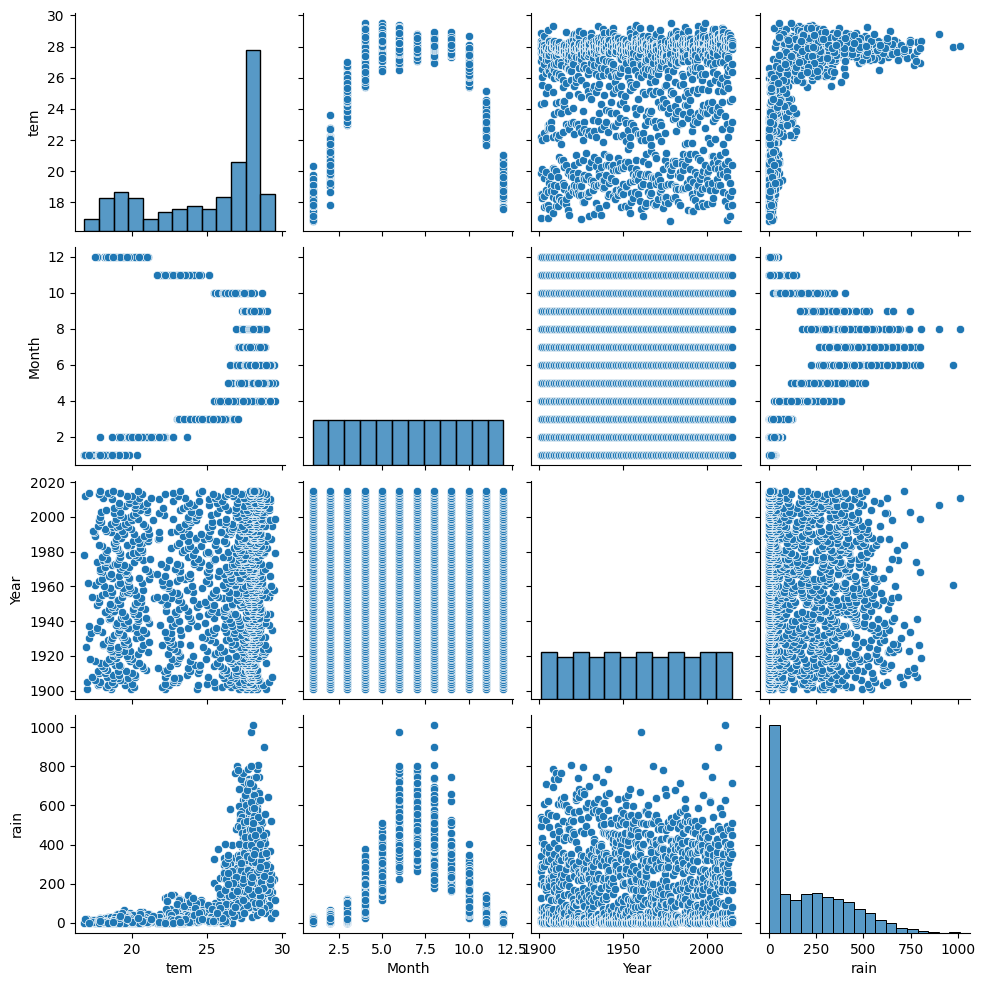

In [21]:
sns.pairplot(df)
plt.show()

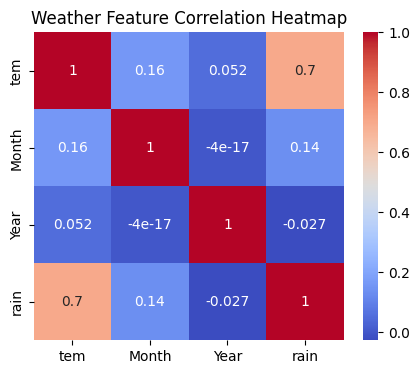

In [22]:
corr = df.corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Weather Feature Correlation Heatmap")
plt.show()

In [12]:
X = df[['Month', 'Year', 'rain']]
y = df['tem']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTrain samples:", X_train.shape, "Test samples:", X_test.shape)


Train samples: (1104, 3) Test samples: (276, 3)


In [14]:
model = LinearRegression()
model.fit(X_train, y_train)
print("\nModel trained.")


Model trained.


In [15]:
y_pred = model.predict(X_test)

In [16]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [17]:
print("\nMetrics on test set:")
print(f"MAE  = {mae:.4f}")
print(f"MSE  = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R2   = {r2:.4f}")


Metrics on test set:
MAE  = 2.1680
MSE  = 6.8951
RMSE = 2.6259
R2   = 0.4538


In [18]:
comp = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.round(y_pred, 3)})
print("\nSample comparison:")
print(comp.head(6))


Sample comparison:
    Actual  Predicted
0  28.2926     29.712
1  28.0705     27.813
2  27.9058     29.784
3  26.6539     26.486
4  20.9764     22.184
5  27.6634     24.847


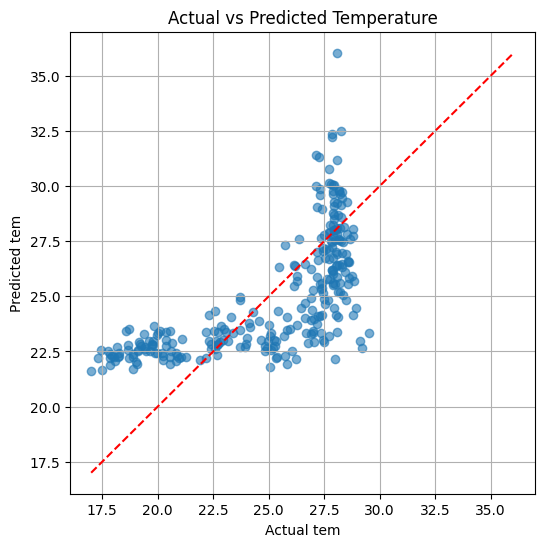

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
mn = min(y_test.min(), y_pred.min())
mx = max(y_test.max(), y_pred.max())
plt.plot([mn,mx],[mn,mx], 'r--')   # perfect prediction line
plt.xlabel('Actual tem')
plt.ylabel('Predicted tem')
plt.title('Actual vs Predicted Temperature')
plt.grid(True)
plt.show()

In [20]:
new_row = pd.DataFrame({
    'Month': [6],   # June
    'Year': [2000],
    'rain': [50.0]
})
pred_new = model.predict(new_row)
print("\nPredicted tem for", new_row.to_dict(orient='records')[0], "->", round(pred_new[0], 3))


Predicted tem for {'Month': 6, 'Year': 2000, 'rain': 50.0} -> 23.487
